<AxesSubplot: >

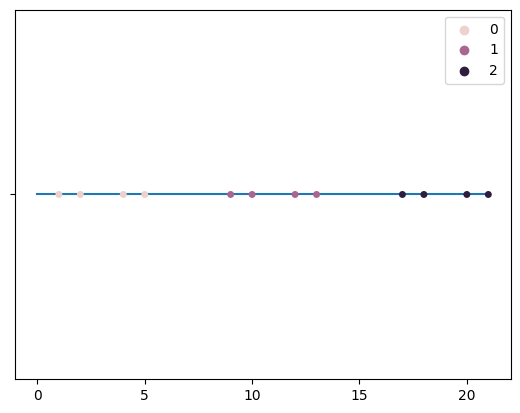

In [34]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score

X_train = np.array([1,2,4,5,      # cluster 1
                    9,10,12,13,   # cluster 2
                    17,18,20,21]) # cluster 3
y_train = np.array([0,0,0,0,
                    1,1,1,1,
                    2,2,2,2])

fig, ax = plt.subplots(nrows=1, ncols=1)

sns.stripplot(x=X_train, jitter=False, hue=y_train, ax=ax)
sns.lineplot(x=[0, 21], y=[0,0])

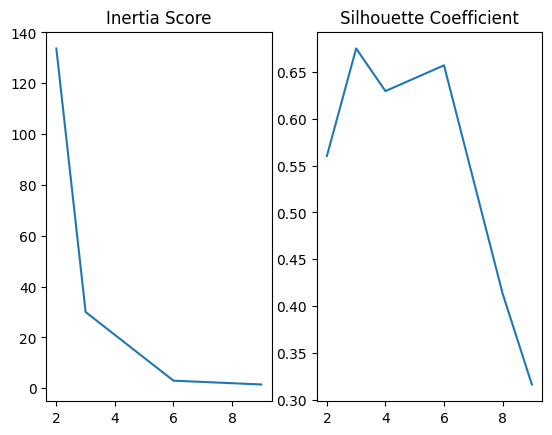

In [54]:
# determine the K values
def isolate():
    # Sum of squared distances of samples to their closest cluster center
    inertia = []
    # The Silhouette Coefficient for a sample is (b - a) / max(a, b)
    # the mean intra-cluster distance (a)
    # the mean nearest-cluster distance (b) for each sample
    silh = []

    n_clusters = range(2,10)
    
    for i in n_clusters:
        kmeans = KMeans(n_clusters=i, random_state=17).fit(X=X_train.reshape(-1,1))
        inertia.append(kmeans.inertia_)
        silh.append(silhouette_score(X_train.reshape(-1,1), kmeans.labels_))

    fig, axes = plt.subplots(nrows=1, ncols=2)

    axes[0].plot(n_clusters, inertia)
    axes[0].set_title('Inertia Score')

    axes[1].plot(n_clusters, silh)
    axes[1].set_title('Silhouette Coefficient')

isolate()

[0 0 0 0 1 1 1 1 2 2 2 2]


<AxesSubplot: >

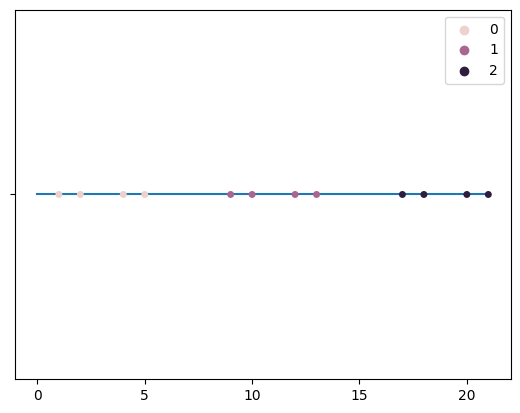

In [33]:
kmeans = KMeans(n_clusters=3,
                # each 3 random selected centroid will iter 1 times
                max_iter=1,
                # only select 3 centroid one times.
                n_init=1,
                # in total, the kmeans attempt 1 * 1 times
                # and choose the attempt with the lowest total variation.
                # total variation in this case is the 
                # Sum of squared distances of samples to their closest cluster center
                random_state=17).fit(X=X_train.reshape(-1,1))
print(kmeans.labels_)

fig, ax = plt.subplots(nrows=1, ncols=1)

sns.stripplot(x=X_train, jitter=False, hue=kmeans.labels_, ax=ax)
sns.lineplot(x=[0, 21], y=[0,0])